In [10]:
import yaml
from typing import List

import numpy as np
import matplotlib.pyplot as plt

import torch

from lit_diffusion.util import instantiate_python_class_from_string_config

In [2]:
ls ../../config/model_configs/downstream_tasks/feature_extractors/multilabel/

s2_climate_zones.yaml  s2_ewc.yaml         s2_rgb.yaml      s2_s1.yaml
s2_era5.yaml           s2_glo_30_dem.yaml  s2_rgb_nir.yaml  s2_seasons.yaml


In [3]:
with open("../../config/model_configs/downstream_tasks/feature_extractors/multilabel/s2_s1.yaml", "r") as config_file:
    config = yaml.safe_load(config_file)

In [4]:
fe_model = instantiate_python_class_from_string_config(config["feature_extractor"], feature_section="middle", feature_levels=[0], vectorize_output=False)

In [6]:
p_theta_model = fe_model.diffusion_pl_module

In [65]:
sampled_data = p_theta_model.p_sample_loop(
    shape=(6, 128, 128),
    safe_intermediaries_every_n_steps=100,
    batch_size=6,
    clip_denoised=True,
)

DDPM sampling on device cuda:0:: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:15<00:00,  7.37it/s]


In [84]:
def visualize_samples(samples: List[torch.Tensor], dimming_factor: float = 3.0, figsize=(12, 8)):
    samples = [samples[idx] for idx in [0, -3, -1]]
    fig, axs = plt.subplots(len(samples), samples[0].shape[0]*3, figsize=figsize)
    
    # For each intermediate step do visualization
    for step, ax_row in zip(samples, axs):
        # For each image in batch visualize Sentinel-2 and Sentinel-1 data
        for i, img in enumerate(step):
            s2_ax, s1_vh_ax, s1_vv_ax = ax_row[i*3:i*3+3]
            # Visualize sampled RGB data
            s2_img = img[[0,1,2], :, :].permute(1, 2, 0).clip(-1, 1) 
            s2_img = ((s2_img + 1) / 2) * dimming_factor
            s2_img = s2_img.clip(0,1).detach().cpu().numpy()
            s2_ax.imshow(s2_img)
            s2_ax.axis("off")
    
            # Visualize sampled S1 data
            # VH
            s1_vh = img[[4], :, :].permute(1, 2, 0).detach().cpu().numpy()
            s1_vh_ax.imshow(s1_vh)
            s1_vh_ax.axis("off")
            # VV
            s1_vv = img[[5], :, :].permute(1, 2, 0).detach().cpu().numpy()
            s1_vv_ax.imshow(s1_vv)
            s1_vv_ax.axis("off")

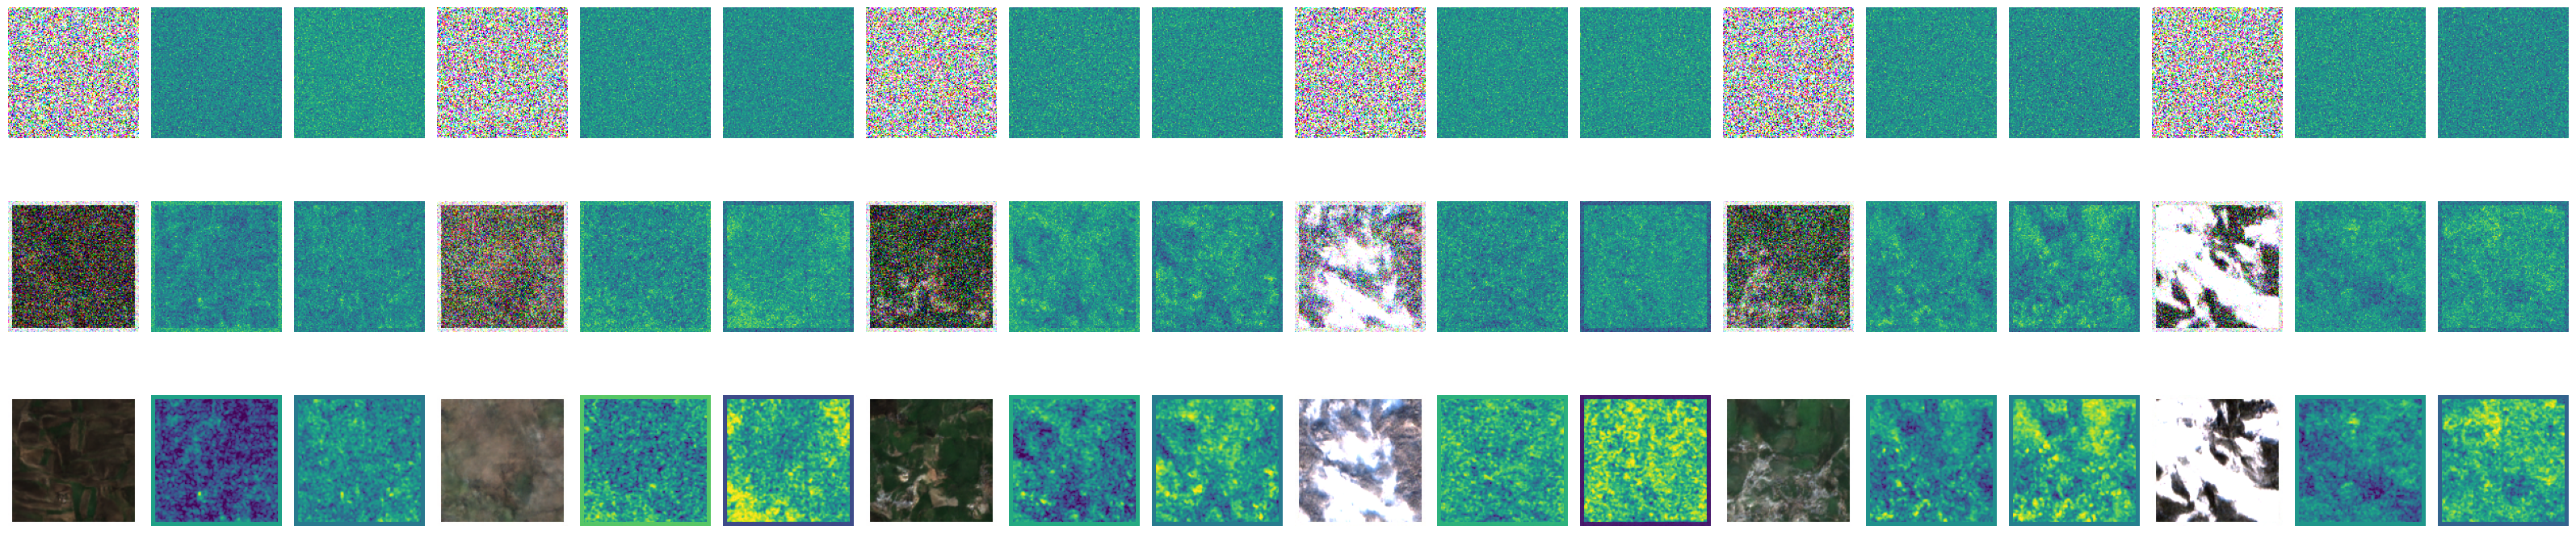

In [90]:
visualize_samples(samples=sampled_data, figsize=(32, 8), dimming_factor=2)
plt.tight_layout()
plt.savefig("sentinel_1_and_2_samples.png")

In [35]:
import pickle
with open("./nice_samples.pkl", "wb") as dump_file:
    pickle.dump(sampled_data, dump_file)

In [76]:
a = list(range(5))

In [78]:
a[(1,2,3)]

TypeError: list indices must be integers or slices, not tuple